In [1]:
library(corrplot)
options(jupyter.plot_mimetypes = "image/png")
library(xtable)
library(ggplot2)

Warning message:
“package ‘corrplot’ was built under R version 3.4.2”corrplot 0.84 loaded


In [2]:
datadir = '../data_meta_analysis/'

In [3]:
data = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_v8b.csv"))
head(data)

Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,⋯,Frontal_Med_Orb_L,Frontal_Med_Orb_R,Insula_L,Insula_R,Cingulum_Ant_L,Cingulum_Ant_R,Cingulum_Mid_L,Cingulum_Mid_R,Postcentral_L,Postcentral_R
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0


In [4]:
colnames(data)

[1] "Precentral_L"         "Precentral_R"         "Frontal_Sup_L"       
 [4] "Frontal_Sup_R"        "Frontal_Sup_Orb_L"    "Frontal_Sup_Orb_R"   
 [7] "Frontal_Mid_L"        "Frontal_Mid_R"        "Frontal_Mid_Orb_L"   
[10] "Frontal_Mid_Orb_R"    "Frontal_Inf_Oper_L"   "Frontal_Inf_Oper_R"  
[13] "Frontal_Inf_Tri_L"    "Frontal_Inf_Tri_R"    "Frontal_Inf_Orb_L"   
[16] "Frontal_Inf_Orb_R"    "Supp_Motor_Area_L"    "Supp_Motor_Area_R"   
[19] "Frontal_Sup_Medial_L" "Frontal_Sup_Medial_R" "Frontal_Med_Orb_L"   
[22] "Frontal_Med_Orb_R"    "Insula_L"             "Insula_R"            
[25] "Cingulum_Ant_L"       "Cingulum_Ant_R"       "Cingulum_Mid_L"      
[28] "Cingulum_Mid_R"       "Postcentral_L"        "Postcentral_R"

In [5]:
X = t(as.matrix(data))


## Combine regions with only a few examples to nearby regions

In [6]:
rowSums(X)
#print(xtable(data.frame(rowSums(X))),type='latex')

Precentral_L         Precentral_R        Frontal_Sup_L 
                 139                  101                   62 
       Frontal_Sup_R    Frontal_Sup_Orb_L    Frontal_Sup_Orb_R 
                  68                   16                   16 
       Frontal_Mid_L        Frontal_Mid_R    Frontal_Mid_Orb_L 
                 152                  134                   21 
   Frontal_Mid_Orb_R   Frontal_Inf_Oper_L   Frontal_Inf_Oper_R 
                  19                   67                   73 
   Frontal_Inf_Tri_L    Frontal_Inf_Tri_R    Frontal_Inf_Orb_L 
                  96                   91                   36 
   Frontal_Inf_Orb_R    Supp_Motor_Area_L    Supp_Motor_Area_R 
                  28                   54                   45 
Frontal_Sup_Medial_L Frontal_Sup_Medial_R    Frontal_Med_Orb_L 
                  86                   78                    3 
   Frontal_Med_Orb_R             Insula_L             Insula_R 
                   3                   29                   27 
      Cingulum_Ant_L       Cingulum_Ant_R       Cingulum_Mid_L 
                  40                   47                   32 
      Cingulum_Mid_R        Postcentral_L        Postcentral_R 
                  26                    8                   13

In [7]:
d=data.frame(x=colSums(X))

In [8]:
regions = c('Frontal_Sup_L', 'Frontal_Sup_R', 
            'Frontal_Sup_Orb_L','Frontal_Sup_Orb_R', 
            'Frontal_Mid_L', 'Frontal_Mid_R',
            'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 
            'Frontal_Inf_Oper_L','Frontal_Inf_Oper_R', 
            'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R',
            'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 
            'Supp_Motor_Area_L','Supp_Motor_Area_R', 
            'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R',
            'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 
            'Insula_L', 'Insula_R',
            'Cingulum_Ant_L', 'Cingulum_Ant_R', 
            'Cingulum_Mid_L','Cingulum_Mid_R', 
            'Postcentral_L', 'Postcentral_R',
            'Precentral_L','Precentral_R')

- Combine precentral and postcentral - these postcentral were supposed to be premotor. 
- Combine mid orb and medial orb

In [9]:
data['Precentral_L'] = as.integer(data[,'Precentral_L']==1 |  data[,'Postcentral_L']==1)
data['Precentral_R'] = as.integer(data[,'Precentral_R']==1 |  data[,'Postcentral_R']==1)

data['Frontal_Mid_Orb_R'] = as.integer(data[,'Frontal_Mid_Orb_R']==1 |data[,'Frontal_Med_Orb_R']==1)
data['Frontal_Mid_Orb_L'] = as.integer(data[,'Frontal_Mid_Orb_L']==1 |data[,'Frontal_Med_Orb_L']==1)


regions2 = c('Frontal_Sup_L', 'Frontal_Sup_R', 
            'Frontal_Sup_Orb_L','Frontal_Sup_Orb_R', 
            'Frontal_Mid_L', 'Frontal_Mid_R',
            'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R', 
            'Frontal_Inf_Oper_L','Frontal_Inf_Oper_R', 
            'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R',
            'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R', 
            'Supp_Motor_Area_L','Supp_Motor_Area_R', 
            'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R',
            'Insula_L', 'Insula_R',
            'Cingulum_Ant_L', 'Cingulum_Ant_R', 
            'Cingulum_Mid_L','Cingulum_Mid_R', 
            'Precentral_L','Precentral_R')

d = data[,regions2]
print(nrow(d))
d = d[complete.cases(d),]
print(nrow(d))
X = t(as.matrix(d))

[1] 891
[1] 891


In [10]:
head(X)

,1,2,3,4,5,6,7,8,9,10,⋯,882,883,884,885,886,887,888,889,890,891
Frontal_Sup_L,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Frontal_Sup_R,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Frontal_Sup_Orb_L,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Frontal_Sup_Orb_R,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Frontal_Mid_L,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Frontal_Mid_R,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [11]:
write.csv(t(X),'../data_meta_analysis/data_derived_meta_analysis/X_region1_before_clustering_v8b.csv',row.names=FALSE)


In [12]:
d=data.frame(x=colSums(X))
options(repr.plot.width=6, repr.plot.height=6)
#ggplot(aes(x=x),data=d)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')

In [13]:
which(colSums(X)==0)

named integer(0)

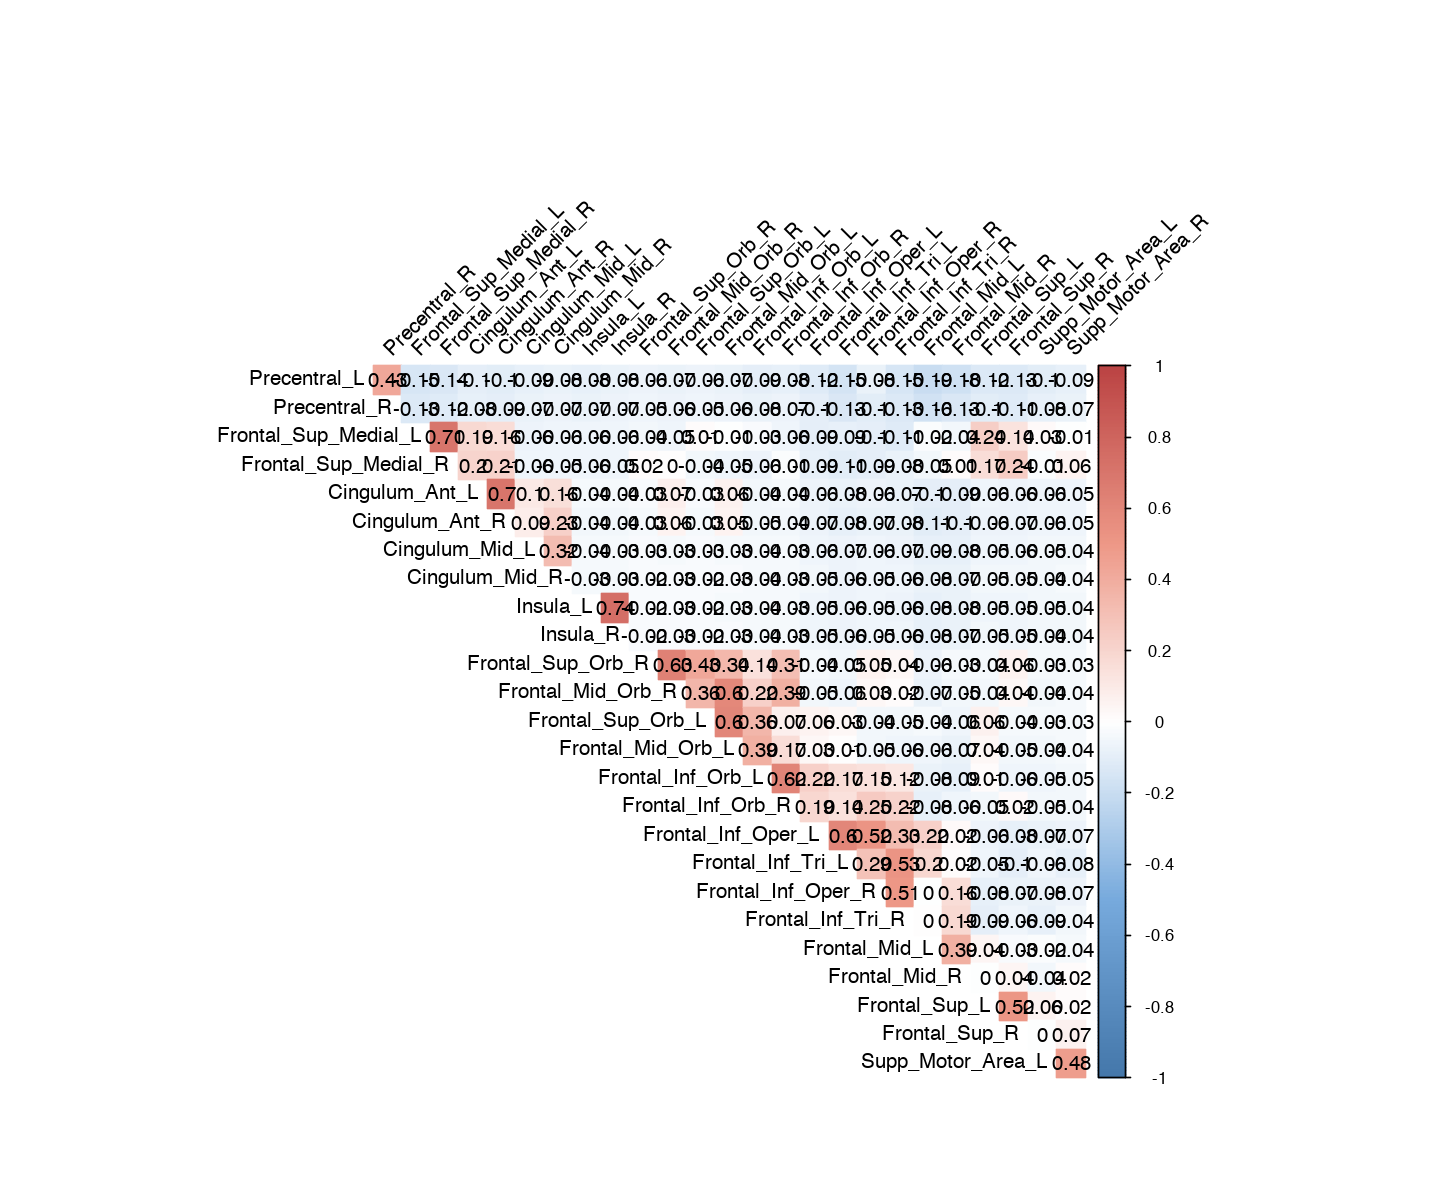

In [14]:
C = cor(t(X))
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=12, repr.plot.height=10)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


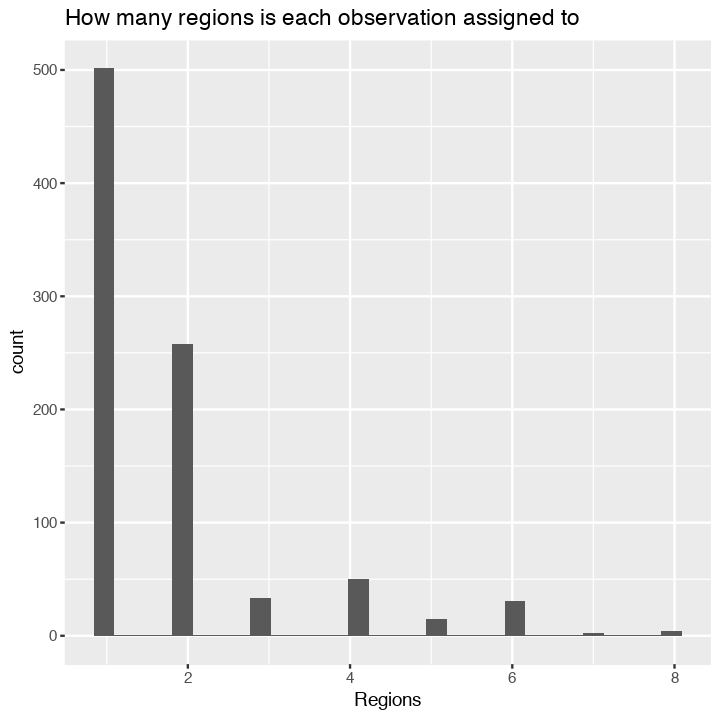

In [15]:
d=data.frame(x=colSums(X))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(aes(x=x),data=d)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')

 Percent of analyses assigned to 1, 2 or more regions

In [16]:
print(sum(colSums(X)==1)/ncol(X))
print(sum(colSums(X)==2)/ncol(X))
print(sum(colSums(X)>2)/ncol(X))

[1] 0.5622896
[1] 0.28844
[1] 0.1492705


In [1]:
0.56+0.29

[1] 0.85

## Creating Bi-Lateral Regressors for left and right 

In [17]:
Xt<-data.frame(t(X))
# exclude all studies contributing more than 2
#Xt=data.frame(Xt[rowSums(Xt)<3,])

# set the rows with 2 or more to be 0
Xtt = Xt
for (row in seq(nrow(Xt))){
    Xrow<-Xt[row,]
    if (sum(Xrow,na.rm =TRUE)==2){
        newreg<-paste(colnames(Xt)[Xrow==1],collapse='+')
        Xtt[row,Xrow==1]=0 # set other columns to 1
        Xtt[row,newreg]=1 # set the new combined regressor to be equal to 1
        #Xt[!row,newreg]=0

    }
    
}
Xtt[is.na(Xtt)]=0

#paste(colnames(Xt)[Xt2[1,]==1],collapse='+')

In [18]:
#colnames(Xtt)

dropping regions assigned to 2 ROIs that are not L and R counterparts. 

In [19]:
dropping<-c('Frontal_Sup_Medial_R+Cingulum_Ant_R','Frontal_Inf_Oper_R+Precentral_L',
           'Frontal_Mid_R+Precentral_R','Frontal_Sup_L+Frontal_Sup_Medial_L',
           'Frontal_Inf_Tri_R+Frontal_Inf_Orb_R','Frontal_Sup_R+Frontal_Sup_Medial_R',
           'Frontal_Mid_L+Precentral_R','Cingulum_Ant_R+Cingulum_Mid_R','Frontal_Mid_R+Frontal_Inf_Tri_L')
Xtt<-Xtt[ , -which(colnames(Xtt) %in% dropping)]

In [20]:
#colnames(Xtt)

In [21]:
# removing rows with 2+ assignments still 
# I wait until the regression to actually do this. 
test = Xtt[rowSums(Xtt)==1,]
nrow(test)/ncol(X)


[1] 0.8383838

In [22]:
write.csv(Xtt,'../data_meta_analysis/data_derived_meta_analysis/X_region1_combined_regs_v8b.csv',row.names=FALSE)

In [23]:
C=cor(Xtt)
#C

Warning message in corrplot(C, method = "color", col = col(200), type = "upper", :
“Not been able to calculate text margin, please try again with a clean new empty window using {plot.new(); dev.off()} or reduce tl.cex”

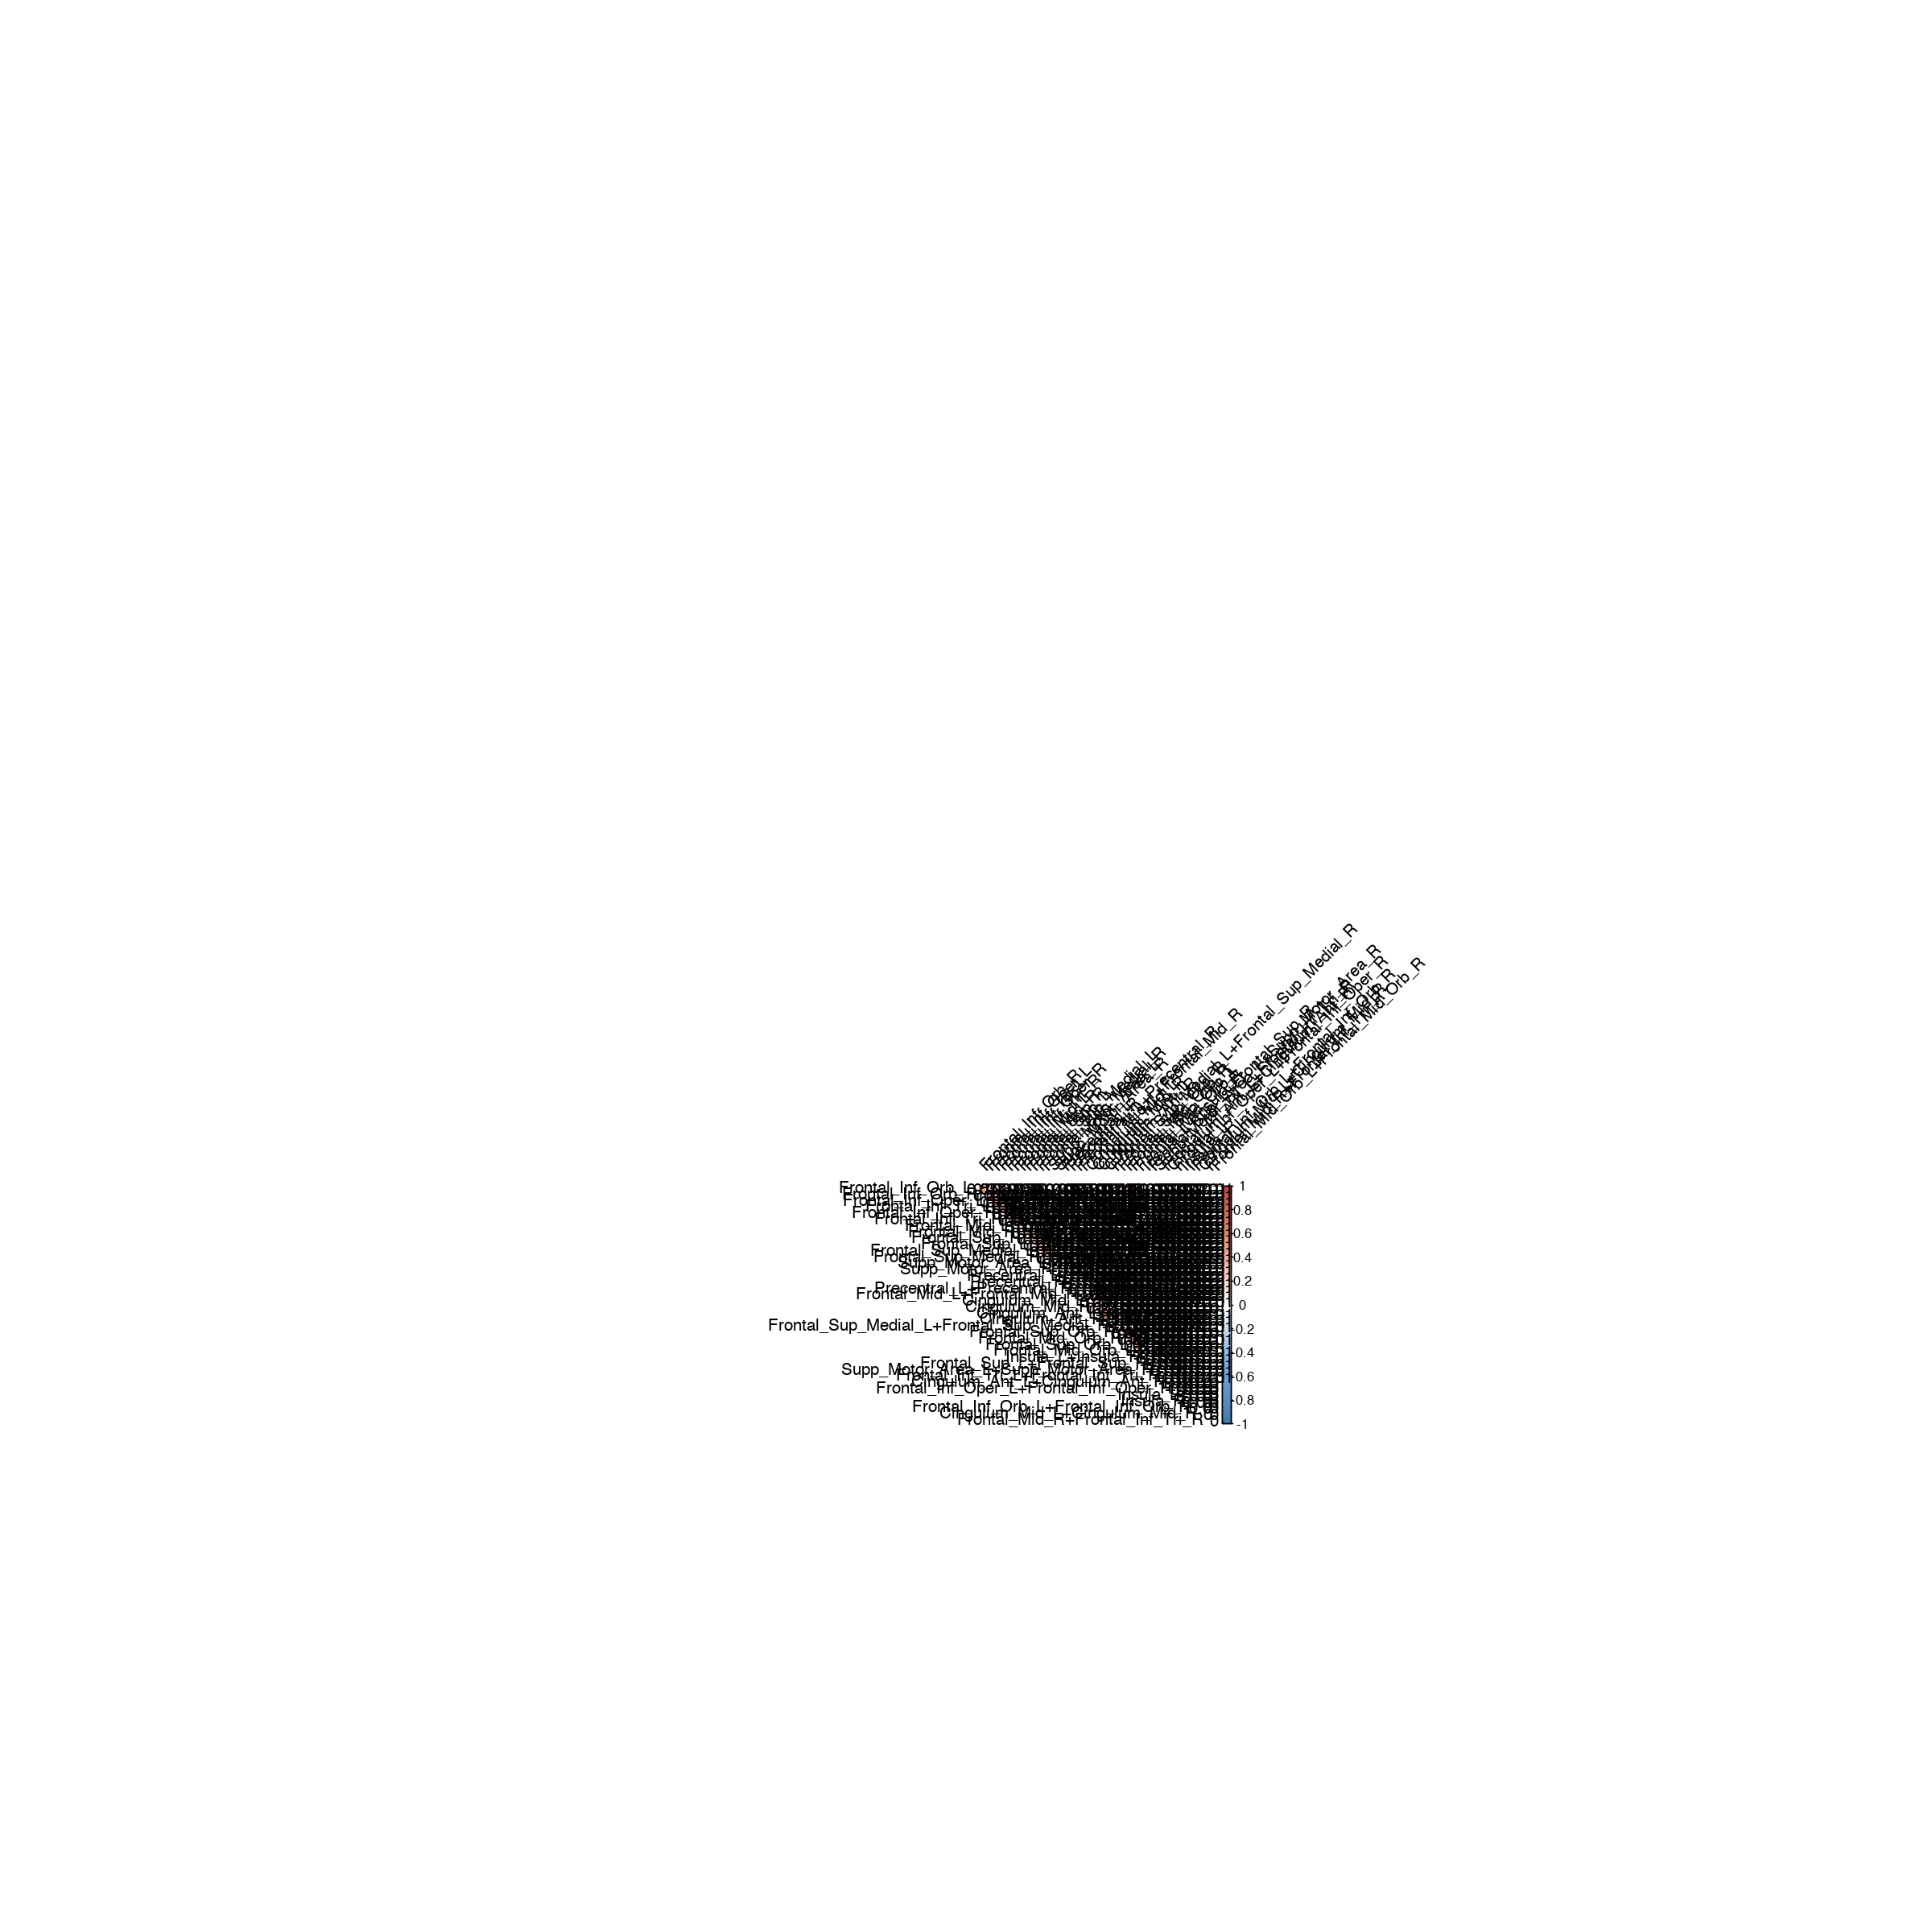

In [24]:
C = cor(Xtt)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=20, repr.plot.height=20)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

## Collapse left and right instead

In [25]:
data = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_v8b.csv"))
head(data)

Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,⋯,Frontal_Med_Orb_L,Frontal_Med_Orb_R,Insula_L,Insula_R,Cingulum_Ant_L,Cingulum_Ant_R,Cingulum_Mid_L,Cingulum_Mid_R,Postcentral_L,Postcentral_R
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0


which regions get combined

In [26]:


data['Precentral_L'] = as.integer(data[,'Precentral_L']==1 |  data[,'Postcentral_L']==1) # add post central to precentral 
data['Precentral_R'] = as.integer(data[,'Precentral_R']==1 |  data[,'Postcentral_R']==1)


data['Frontal_Mid'] = as.integer(data[,'Frontal_Mid_L']==1 |  data[,'Frontal_Mid_R']==1)
data['Frontal_Mid_Orb_R'] = as.integer(data[,'Frontal_Mid_Orb_R']==1 |data[,'Frontal_Med_Orb_R']==1) # add medial to mid
data['Frontal_Mid_Orb_L'] = as.integer(data[,'Frontal_Mid_Orb_L']==1 |data[,'Frontal_Med_Orb_L']==1)
data['Frontal_Mid_Orb'] = as.integer(data[,'Frontal_Mid_Orb_L']==1 |  data[,'Frontal_Mid_Orb_R']==1 | data[,'Frontal_Sup_Orb_L']==1 |  data[,'Frontal_Sup_Orb_R']==1) # add sup orb to mid


data['Frontal_Sup'] = as.integer(data[,'Frontal_Sup_L']==1 |  data[,'Frontal_Sup_R']==1)
data['Frontal_Sup_Medial'] = as.integer(data[,'Frontal_Sup_Medial_L']==1 |  data[,'Frontal_Sup_Medial_R']==1)


data['Insula'] = as.integer(data[,'Insula_L']==1 |  data[,'Insula_R']==1)

data['Precentral'] = as.integer(data[,'Precentral_L']==1 |  data[,'Precentral_R']==1)
data['Supp_Motor_Area'] = as.integer(data[,'Supp_Motor_Area_L']==1 |  data[,'Supp_Motor_Area_R']==1)

data['Frontal_Inf_Oper'] = as.integer(data[,'Frontal_Inf_Oper_L']==1 |  data[,'Frontal_Inf_Oper_R']==1)
data['Frontal_Inf_Tri'] = as.integer(data[,'Frontal_Inf_Tri_L']==1 |  data[,'Frontal_Inf_Tri_R']==1)
data['Frontal_Inf_Orb'] = as.integer(data[,'Frontal_Inf_Orb_L']==1 |  data[,'Frontal_Inf_Orb_R']==1)


data['Cingulum_Ant'] = as.integer(data[,'Cingulum_Ant_L']==1 |  data[,'Cingulum_Ant_R']==1)
data['Cingulum_Mid'] = as.integer(data[,'Cingulum_Mid_L']==1 |  data[,'Cingulum_Mid_R']==1)




In [27]:
regions2 = c('Precentral','Frontal_Mid','Frontal_Mid_Orb',
             'Frontal_Inf_Orb','Frontal_Inf_Oper','Frontal_Inf_Tri',
             'Supp_Motor_Area','Cingulum_Mid','Cingulum_Ant',
             'Frontal_Sup','Frontal_Sup_Medial','Insula')

d = data[,regions2]
print(nrow(d))
d = d[complete.cases(d),]
print(nrow(d))
X = t(as.matrix(d))
C = cor(t(X))

[1] 891
[1] 891


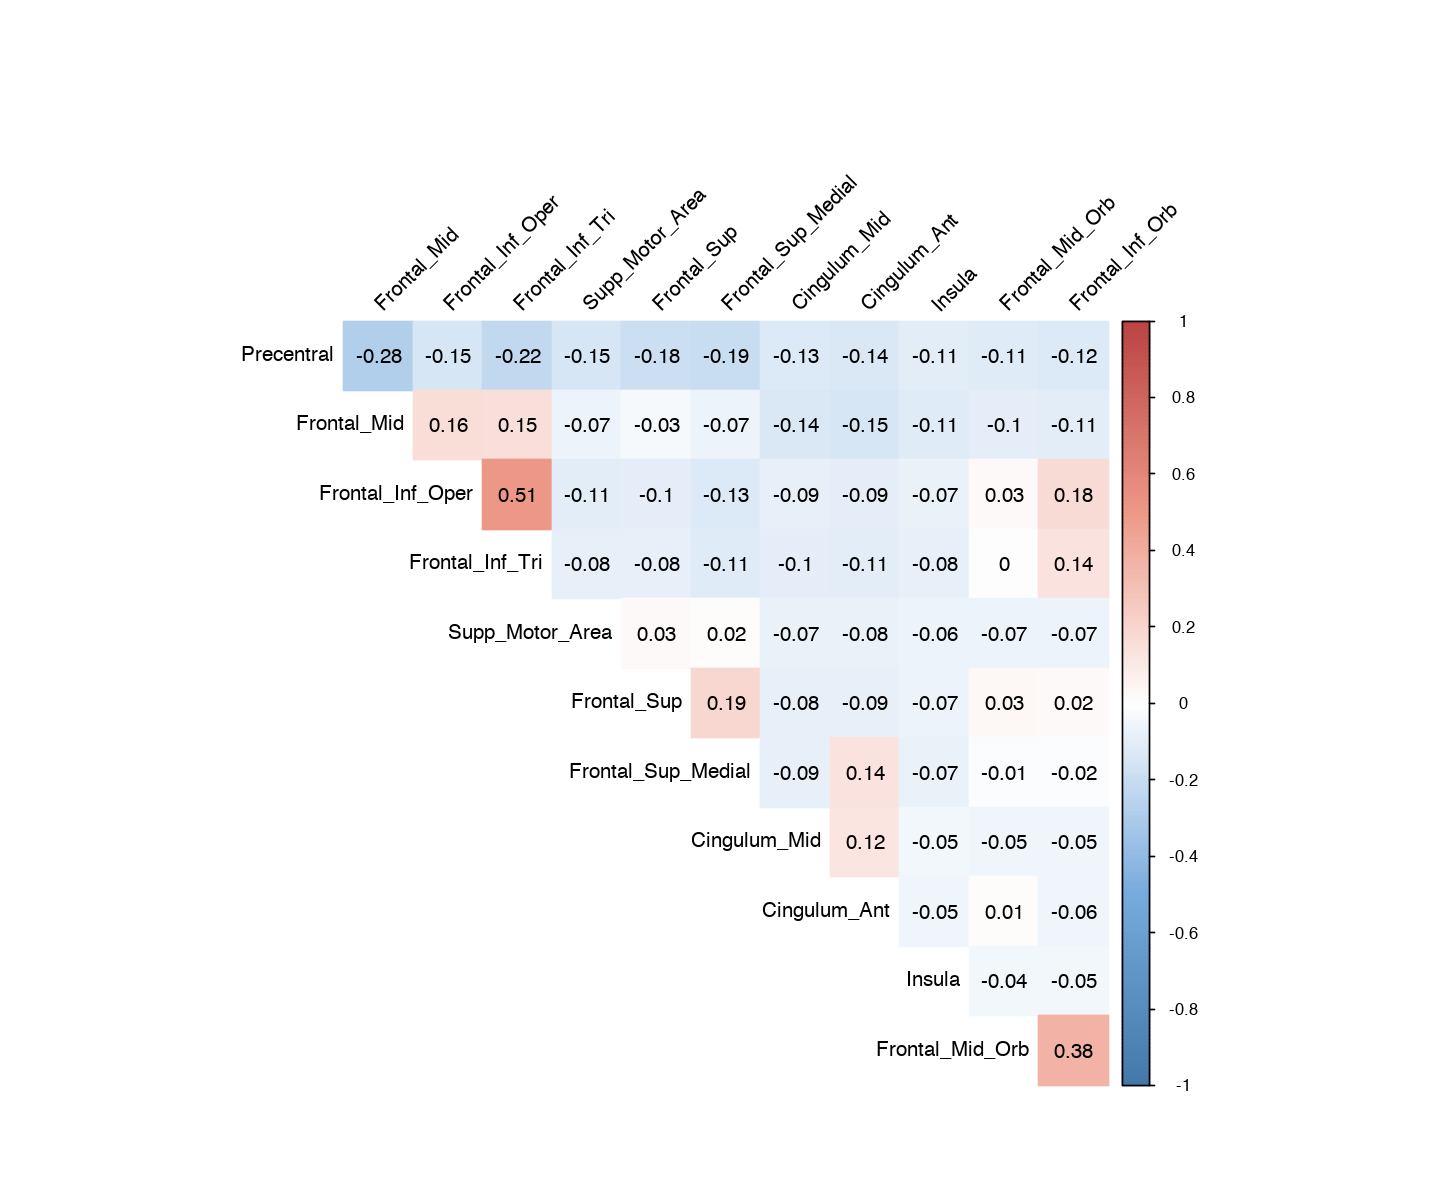

In [28]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=12, repr.plot.height=10)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

In [29]:
which(colSums(X)==0)

named integer(0)

In [30]:
write.csv(t(X),'../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering_lr_v8b.csv',row.names=FALSE)

In [31]:
xtable(data.frame(colSums(t(X))))

,colSums.t.X..
Precentral,195
Frontal_Mid,217
Frontal_Mid_Orb,40
Frontal_Inf_Orb,44
Frontal_Inf_Oper,101
Frontal_Inf_Tri,133
Supp_Motor_Area,74
Cingulum_Mid,48
Cingulum_Ant,56
Frontal_Sup,94


In [32]:
#print(xtable(data.frame(colSums(t(X)))),type='latex')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


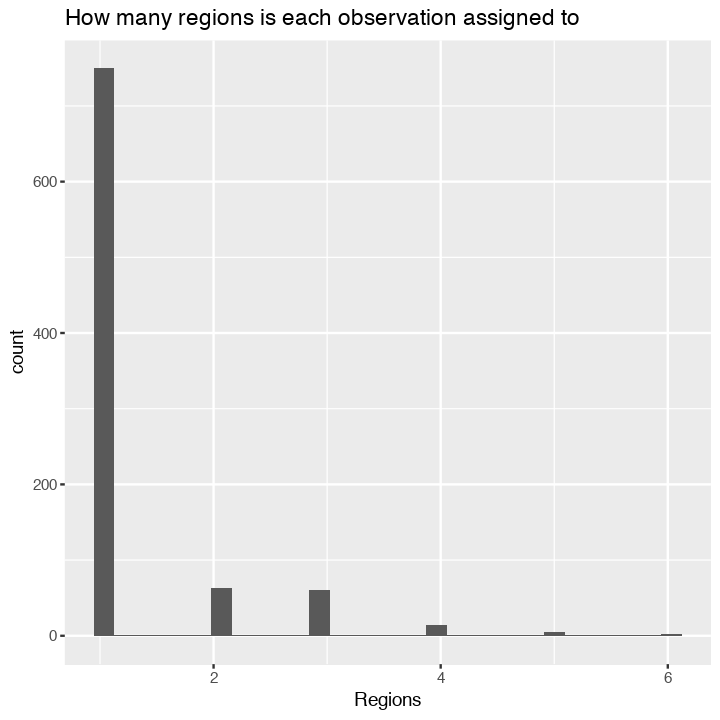

In [33]:
d=data.frame(x=colSums(X))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(aes(x=x),data=d)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')

In [34]:
sum(colSums(X)>1)/ncol(X)

[1] 0.1593715

## Collapse even further 

In [35]:


data['Cingulum']=as.integer(data[,'Cingulum_Ant_L']==1 | data[,'Cingulum_Ant_R']==1 | data[,'Cingulum_Mid_L']==1 | data[,'Cingulum_Mid_R']==1)
data['Motor']=as.integer(data[,'Supp_Motor_Area_L']==1 | data[,'Supp_Motor_Area_R']==1 | data[,'Precentral_L']==1| data[,'Precentral_R']==1)
data['Frontal_Inf']=as.integer(data[,'Frontal_Inf_Oper_L']==1 | data[,'Frontal_Inf_Oper_R']==1 | data[,'Frontal_Inf_Tri_R']==1| data[,'Frontal_Inf_Tri_L']==1 | data[,'Frontal_Inf_Orb']==1)
data['Frontal_Mid']=as.integer(data[,'Frontal_Mid_L']==1 | data[,'Frontal_Mid_R']==1)
data['Frontal_Sup']=as.integer(data[,'Frontal_Sup_L']==1 | data[,'Frontal_Sup_R']==1|data[,'Frontal_Sup_Medial_L']==1 |data[,'Frontal_Sup_Medial_R']==1  )
data['Frontal_Orb']=as.integer(data[,'Frontal_Mid_Orb_L']==1 | data[,'Frontal_Mid_Orb_R']==1 |data[,'Frontal_Sup_Orb_L']==1 | data[,'Frontal_Sup_Orb_R']==1)
data['Insula']=as.integer(data[,'Insula_L']==1 | data[,'Insula_R']==1)

#data['Precentral'] = as.integer(data[,'Precentral_L']==1 |  data[,'Precentral_R']==1)

#data['Frontal_Mid'] = as.integer(data[,'Frontal_Mid_L']==1 |  data[,'Frontal_Mid_R']==1)
#data['Frontal_Mid_Orb'] = as.integer(data[,'Frontal_Mid_Orb_L']==1 |  data[,'Frontal_Mid_Orb_R']==1)
#data['Frontal_Inf_Oper'] = as.integer(data[,'Frontal_Inf_Oper_L']==1 |  data[,'Frontal_Inf_Oper_R']==1)
#data['Frontal_Inf_Tri'] = as.integer(data[,'Frontal_Inf_Tri_L']==1 |  data[,'Frontal_Inf_Tri_R']==1)
#data['Frontal_Inf_Orb'] = as.integer(data[,'Frontal_Inf_Orb_L']==1 |  data[,'Frontal_Inf_Orb_R']==1)
#data['Supp_Motor_Area'] = as.integer(data[,'Supp_Motor_Area_L']==1 |  data[,'Supp_Motor_Area_R']==1)
#data['Frontal_Med_Orb'] = as.integer(data[,'Frontal_Med_Orb_L']==1 |  data[,'Frontal_Med_Orb_R']==1)
#data['Cingulum_Mid'] = as.integer(data[,'Cingulum_Mid_L']==1 |  data[,'Cingulum_Mid_R']==1)
#data['Postcentral'] = as.integer(data[,'Postcentral_L']==1 |  data[,'Postcentral_R']==1)
#data['Precentral'] = as.integer(data[,'Precentral_L']==1 |  data[,'Precentral_R']==1)


regions4 = c('Frontal_Sup',
            'Frontal_Mid',
            'Frontal_Inf',
             'Frontal_Orb',
            'Insula',
            'Motor',
            'Cingulum')

d = data[,regions4]
print(nrow(d))
d = d[complete.cases(d),]
print(nrow(d))
X = t(as.matrix(d))

[1] 891
[1] 891


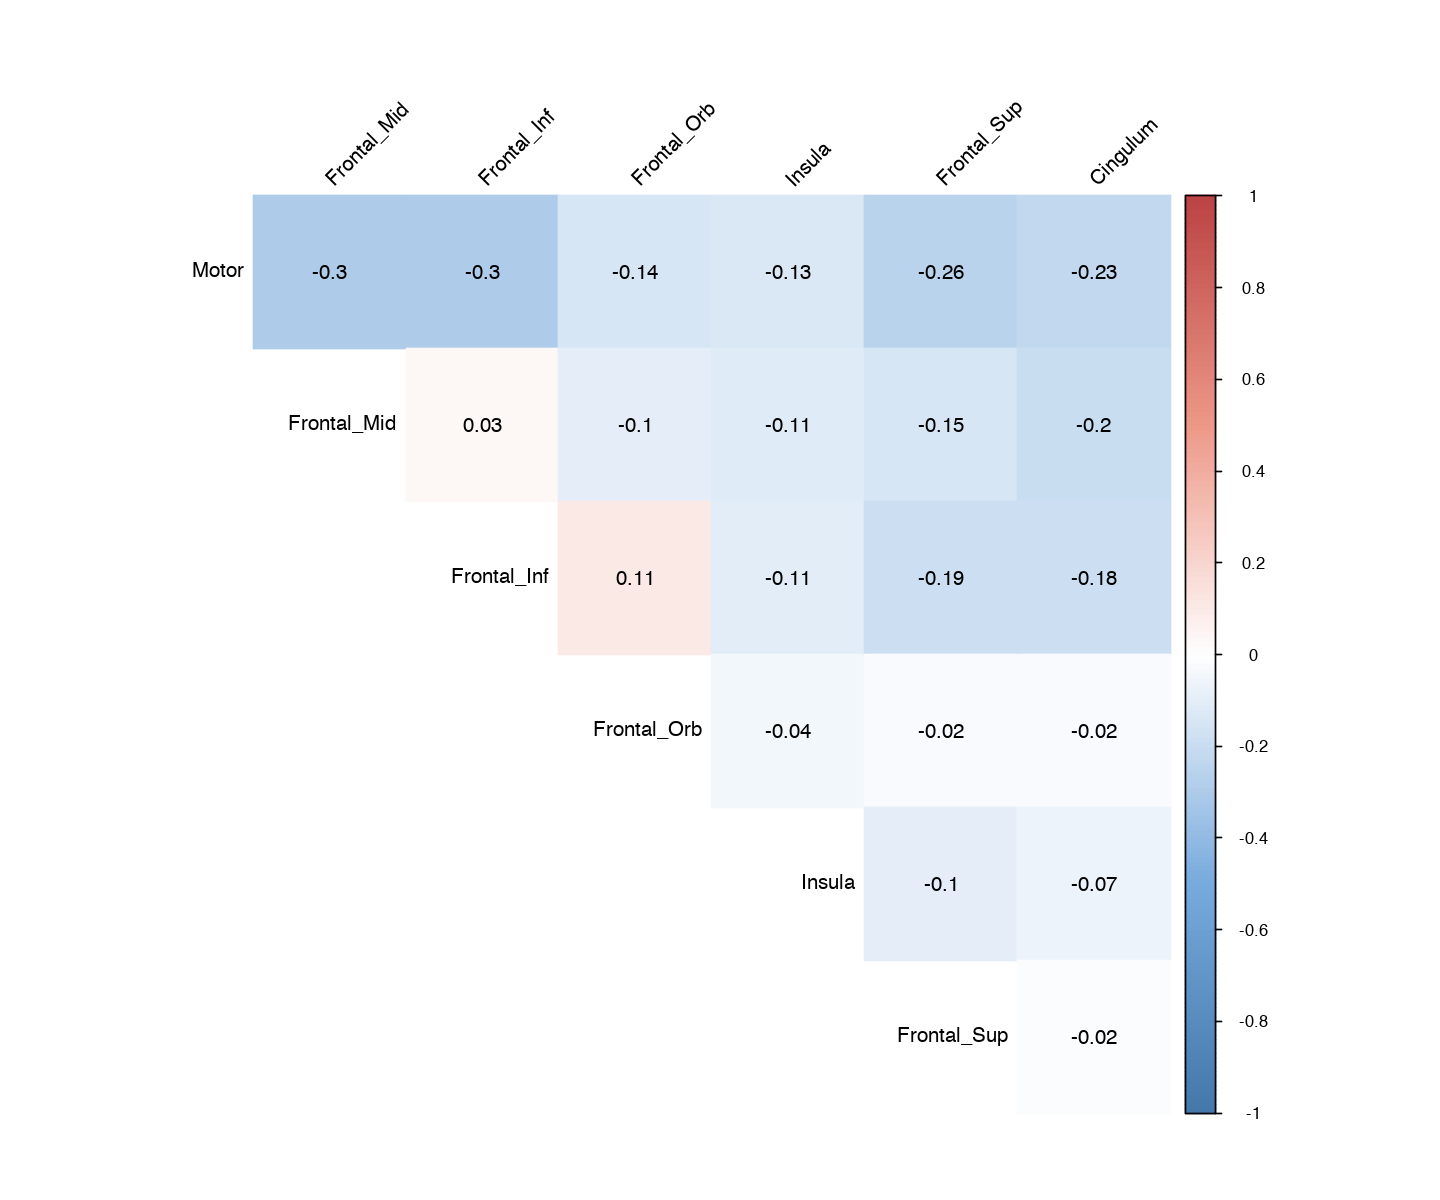

In [36]:
C = cor(t(X))
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=12, repr.plot.height=10)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

In [37]:
write.csv(t(X),'../data_meta_analysis/data_derived_meta_analysis/X_region1_after_clustering2_v8b.csv',row.names=FALSE)
